In [26]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from confidence import ConfidenceInterval

sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix iss

folder_break = "./Data/Break/Break"
folder_no_break = "./Data/NoBreak/NoBreak"
values = 11

In [27]:
no_break_stats = []
no_break_means = []

for i in range(values):
    location = folder_no_break + str(i + 1) + ".csv"
    no_break_stats.append(pd.read_csv(location))
    no_break_means.append(no_break_stats[i]["FocusReal"].mean())

df_no_break = pd.DataFrame(no_break_means, columns=['Focus Mean'])
no_break_mean = sum(no_break_means) / len(no_break_means)

In [28]:
break_stats = []
break_means = []

for i in range(values):
    location = folder_break + str(i + 1) + ".csv"
    break_stats.append(pd.read_csv(location))
    break_means.append(break_stats[i]["FocusReal"].mean())

df_break = pd.DataFrame(break_means, columns=['Focus Mean'])
break_mean = sum(break_means) / len(break_means)

In [29]:
differences = []

for i in range(values):
    differences.append(break_means[i] - no_break_means[i])

differences_mean = sum(differences) / len(differences)

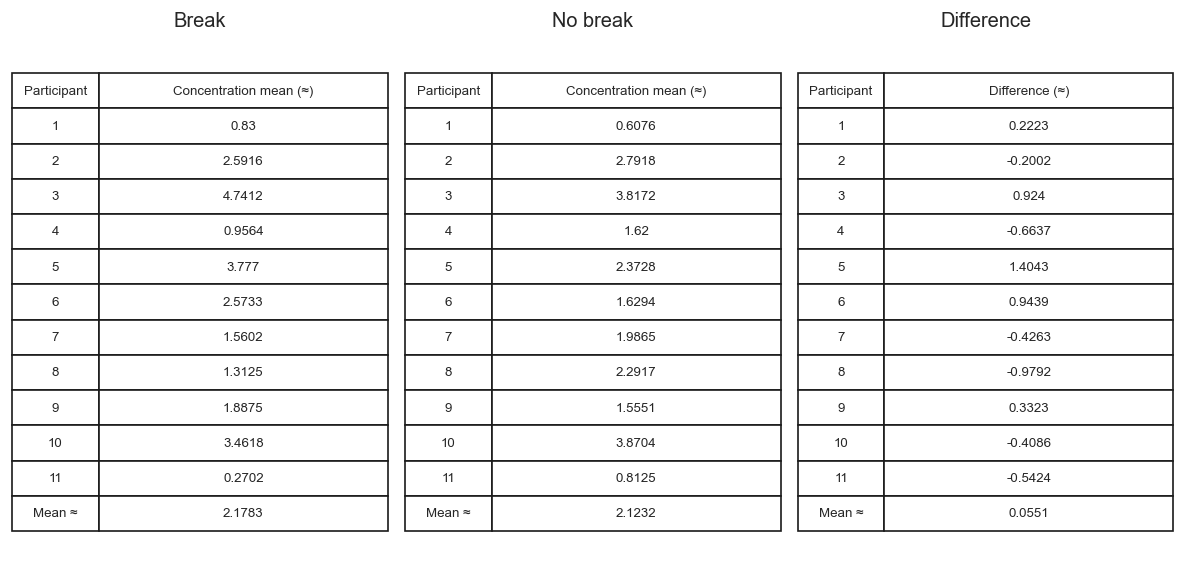

In [30]:
table_data_break = []
table_data_no_break = []
table_differences = []

for i in range(values):
    table_data_break.append([i+1, break_means[i].round(4)])
    table_data_no_break.append([i+1, no_break_means[i].round(4)])
    table_differences.append([i+1, differences[i].round(4)])

table_data_break.append(["Mean ≈", break_mean.round(4)])
table_data_no_break.append(["Mean ≈", no_break_mean.round(4)])
table_differences.append(["Mean ≈", differences_mean.round(4)])

fig, axs = plt.subplots(1, 3)

table_break = axs[0].table(cellText=table_data_break, cellLoc='center', loc='center', colLabels=["Participant", "Concentration mean (≈)"], colWidths=[0.3,1])
table_break.set_fontsize(14)
table_break.scale(1,1.5)
axs[0].axis('off')
axs[0].set_title("Break")

table_no_break = axs[1].table(cellText=table_data_no_break, cellLoc='center', loc='center', colLabels=["Participant", "Concentration mean (≈)"], colWidths=[0.3,1])
table_no_break.set_fontsize(14)
table_no_break.scale(1,1.5)
axs[1].axis('off')
axs[1].set_title("No break")

table_no_break = axs[2].table(cellText=table_differences, cellLoc='center', loc='center', colLabels=["Participant", "Difference (≈)"], colWidths=[0.3,1])
table_no_break.set_fontsize(14)
table_no_break.scale(1,1.5)
axs[2].axis('off')
axs[2].set_title("Difference")

fig.dpi = 120
plt.tight_layout()
plt.show()


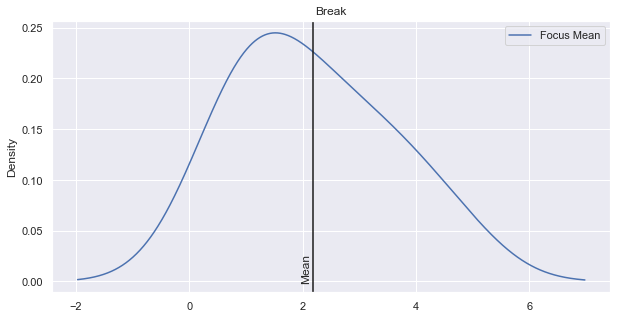

In [31]:
ax = df_break.plot(kind='density', title = "Break")
ax.axvline(break_mean, color='k')
ax.text(break_mean - 0.2, 0, "Mean", rotation=90);

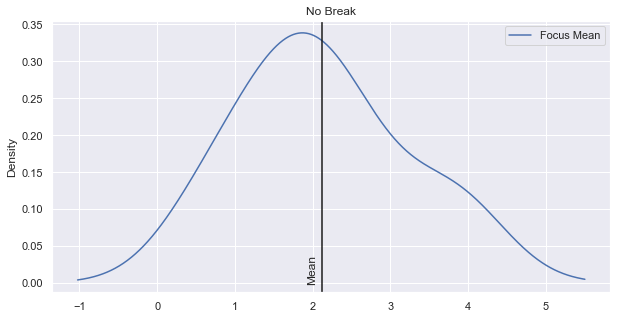

In [32]:
ax = df_no_break.plot(kind='density', title = "No Break")
ax.axvline(no_break_mean, color='k')
ax.text(no_break_mean - 0.2, 0, "Mean", rotation=90);

In [33]:
sm.stats.normal_ad(df_break['Focus Mean'])

(0.22185571764419265, 0.7732543930326101)

In [34]:
sm.stats.normal_ad(df_no_break['Focus Mean'])




(0.29862129089488043, 0.5238627963639336)

In [35]:
t_value = 2.228

break_sample_deviation = ConfidenceInterval.GetSampleDeviation(break_means)
ConfidenceInterval.GetConfidenceInterval(break_mean, break_sample_deviation, values, t_value)



(1.245875761277774, 3.1107672241353557)

In [36]:
no_break_sample_deviation = ConfidenceInterval.GetSampleVariance(no_break_means)
ConfidenceInterval.GetConfidenceInterval(no_break_mean, no_break_sample_deviation, values, t_value)


(1.3632170304051225, 2.88317361901193)

In [37]:
difference_sample_deviation = ConfidenceInterval.GetSampleVariance(differences)
ConfidenceInterval.GetConfidenceInterval(differences_mean, difference_sample_deviation, values, t_value)

(-0.34291999246139016, 0.453172328457467)